In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('seaborn-v0_8')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

#### Data collection

In [2]:
df = pd.read_csv('../data/raw/train.csv')

# 1. Initial EDA - Understand Data

#### Check shape

In [3]:
df.shape

(630000, 13)

#### Show top 5 records

In [4]:
df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


#### Check Info (dtypes, non-null counts)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


**Comment:** Perfect data quality: 
- 630K rows
- no missing values
- but 58% categorical features need encoding before modeling

#### Check statistics of dataset

In [6]:
df.describe()

,id,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,20.545821,4.002337,71.987261,7.072758,62.506672
std,181865.479132,2.260238,2.359880,17.430098,1.744811,18.916884
min,0.000000,17.000000,0.080000,40.600000,4.100000,19.599000
25%,157499.750000,19.000000,1.970000,57.000000,5.600000,48.800000
50%,314999.500000,21.000000,4.000000,72.600000,7.100000,62.600000
75%,472499.250000,23.000000,6.050000,87.200000,8.600000,76.300000
max,629999.000000,24.000000,7.910000,99.400000,9.900000,100.000000


# 2. Basic Cleaning

#### Drop column "id"

In [7]:
df.drop('id', axis=1, inplace=True, errors='ignore')

In [8]:
df.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


#### Convert data type "object" to "category"

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns

df[categorical_cols] = df[categorical_cols].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   age               630000 non-null  int64   
 1   gender            630000 non-null  category
 2   course            630000 non-null  category
 3   study_hours       630000 non-null  float64 
 4   class_attendance  630000 non-null  float64 
 5   internet_access   630000 non-null  category
 6   sleep_hours       630000 non-null  float64 
 7   sleep_quality     630000 non-null  category
 8   study_method      630000 non-null  category
 9   facility_rating   630000 non-null  category
 10  exam_difficulty   630000 non-null  category
 11  exam_score        630000 non-null  float64 
dtypes: category(7), float64(4), int64(1)
memory usage: 28.2 MB


# 3. Find issues
- Missing values check
- Duplicates check
- Outliers detection
- Data type validation
- Logical validation

#### List all categorical and numerical columns

In [11]:
categorical_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

Categorical columns: ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']
Numerical columns: ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']


#### Check missing values
- Check: `df.isnull().sum()`
- Action: `fillna()` hoặc `dropna()`.

---
- Nếu phân phối chuẩn (hình chuông): Điền bằng Mean.
- Nếu phân phối bị lệch (skewed): Điền bằng Median (an toàn hơn vì không bị ảnh hưởng bởi outlier).
- Nếu là biến phân loại: Điền bằng Mode (giá trị xuất hiện nhiều nhất).

In [12]:
df.isnull().sum()

age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

**Comment:** There are no missing values!

#### Check duplicate records

In [13]:
df.duplicated().sum()

0

**Comment:** No duplicates records

#### Check outliers (for numerical features)

To identify and visualize extreme values in Numerical features using the Interquartile Range (IQR) method and box plots to determine the extent of data anomalies


AGE:
  Range: [17.00, 24.00]
  IQR bounds: [13.00, 29.00]
  Outliers: 0 (0.00%)

STUDY_HOURS:
  Range: [0.08, 7.91]
  IQR bounds: [-4.15, 12.17]
  Outliers: 0 (0.00%)

CLASS_ATTENDANCE:
  Range: [40.60, 99.40]
  IQR bounds: [11.70, 132.50]
  Outliers: 0 (0.00%)

SLEEP_HOURS:
  Range: [4.10, 9.90]
  IQR bounds: [1.10, 13.10]
  Outliers: 0 (0.00%)

EXAM_SCORE:
  Range: [19.60, 100.00]
  IQR bounds: [7.55, 117.55]
  Outliers: 0 (0.00%)

--------------------------------------------------------------------------------
OUTLIER SUMMARY TABLE:
         Feature    Q1    Q3   IQR  Lower Bound  Upper Bound  Outliers Percentage  Min Value  Max Value
             age 19.00 23.00  4.00        13.00        29.00         0      0.00%     17.000      24.00
     study_hours  1.97  6.05  4.08        -4.15        12.17         0      0.00%      0.080       7.91
class_attendance 57.00 87.20 30.20        11.70       132.50         0      0.00%     40.600      99.40
     sleep_hours  5.60  8.60  3.00       

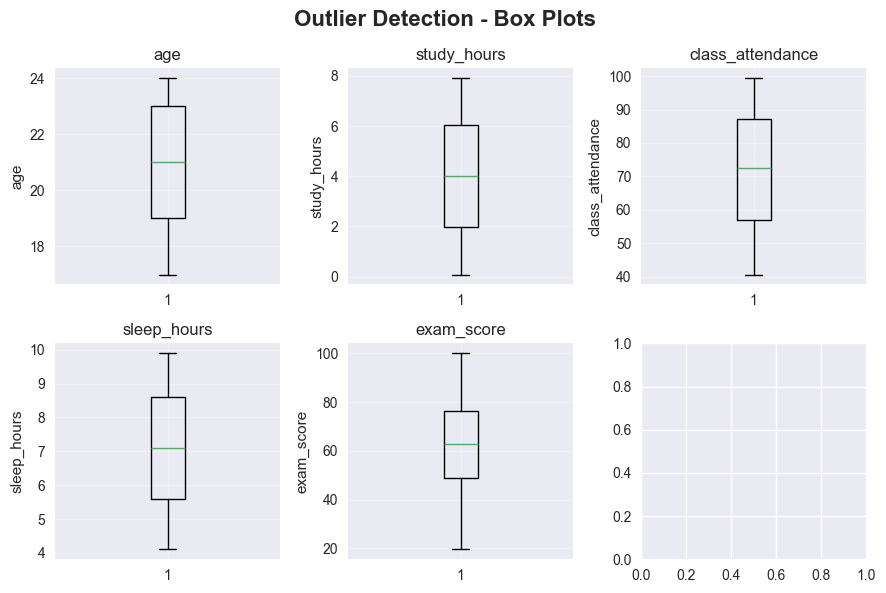

In [14]:
numerical_cols = df.select_dtypes(include='number')
# print(df_numeric)
outlier_summary = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)
    pct_outliers = num_outliers / len(df) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers': num_outliers,
        'Percentage': f"{pct_outliers:.2f}%",
        'Min Value': df[col].min(),
        'Max Value': df[col].max()
    })
    
    print(f"\n{col.upper()}:")
    print(f"  Range: [{df[col].min():.2f}, {df[col].max():.2f}]")
    print(f"  IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers: {num_outliers} ({pct_outliers:.2f}%)")

outlier_df = pd.DataFrame(outlier_summary)
print("\n" + "-"*80)
print("OUTLIER SUMMARY TABLE:")
print(outlier_df.to_string(index=False))

fig, axes = plt.subplots(2, 3, figsize=(9, 6))
fig.suptitle('Outlier Detection - Box Plots', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    ax.boxplot(df[col].dropna(), vert=True)
    ax.set_ylabel(col)
    ax.set_title(f'{col}')
    ax.grid(True, alpha=0.3)

# Remove empty subplot if odd number of features
if len(numerical_cols) % 3 != 0:
    fig.delaxes(axes[1, 2])

plt.tight_layout()

#### Check inconsistent values (for categorical attributes)

To identify data quality issues like hidden typos, extra whitespaces, or severe class imbalances that could bias your analysis or cause machine learning models to fail

In [15]:
# CHECK CATEGORICAL VALUES CONSISTENCY

for col in categorical_cols:
    print("-" * 80)
    print(f"{col.upper()}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Value counts:")
    value_counts = df[col].value_counts()
    for val, count in value_counts.items():
        pct = count / len(df) * 100
        # Check for spacing issues
        has_space = '  ' in str(val) or str(val).startswith(' ') or str(val).endswith(' ')
        space_warning = " (contains extra spaces)" if has_space else ""
        print(f"    '{val}': {count} ({pct:.2f}%){space_warning}")
    
    # Check for potential typos/inconsistencies
    unique_values = df[col].unique()
    print(f"  All unique values: {sorted(unique_values)}")

--------------------------------------------------------------------------------
GENDER:
  Unique values: 3
  Value counts:
    'other': 211097 (33.51%)
    'male': 210593 (33.43%)
    'female': 208310 (33.07%)
  All unique values: ['female', 'male', 'other']
--------------------------------------------------------------------------------
COURSE:
  Unique values: 7
  Value counts:
    'b.tech': 131236 (20.83%)
    'b.sc': 111554 (17.71%)
    'b.com': 110932 (17.61%)
    'bca': 88721 (14.08%)
    'bba': 75644 (12.01%)
    'ba': 61989 (9.84%)
    'diploma': 49924 (7.92%)
  All unique values: ['b.com', 'b.sc', 'b.tech', 'ba', 'bba', 'bca', 'diploma']
--------------------------------------------------------------------------------
INTERNET_ACCESS:
  Unique values: 2
  Value counts:
    'yes': 579423 (91.97%)
    'no': 50577 (8.03%)
  All unique values: ['no', 'yes']
--------------------------------------------------------------------------------
SLEEP_QUALITY:
  Unique values: 3
  Value co

#### Logic validation

In [16]:
validation_issues = []

# 1. Check exam_score (0-100)
invalid_exam = df[(df['exam_score'] < 0) | (df['exam_score'] > 100)]
if not invalid_exam.empty:
    validation_issues.append(f"exam_score out of range [0-100]: {len(invalid_exam)} rows")

# 2. Check study_hours (0-24)
invalid_study = df[(df['study_hours'] < 0) | (df['study_hours'] > 24)]
if not invalid_study.empty:
    validation_issues.append(f"study_hours out of range [0-24]: {len(invalid_study)} rows")

# 3. Check sleep_hours (0-24)
invalid_sleep = df[(df['sleep_hours'] < 0) | (df['sleep_hours'] > 24)]
if not invalid_sleep.empty:
    validation_issues.append(f"sleep_hours out of range [0-24]: {len(invalid_sleep)} rows")

# 4. Check class_attendance (0-100)
invalid_attendance = df[(df['class_attendance'] < 0) | (df['class_attendance'] > 100)]
if not invalid_attendance.empty:
    validation_issues.append(f"class_attendance out of range [0-100]: {len(invalid_attendance)} rows")

# 5. Check age (15-30)
invalid_age = df[(df['age'] < 15) | (df['age'] > 30)]
if not invalid_age.empty:
    validation_issues.append(f"age outside typical student range [15-30]: {len(invalid_age)} rows")

# --- PRINT RESULTS ---
if validation_issues:
    print("LOGICAL VALIDATION ISSUES FOUND:")
    for issue in validation_issues:
        print(f"  - {issue}")
else:
    print("✓ All logical validation checks passed!")

✓ All logical validation checks passed!


**Comment:** The categorical features are highly consistent with no formatting errors or redundant spacing; most variables exhibit a balanced distribution, though INTERNET_ACCESS and EXAM_DIFFICULTY show significant class imbalance that may influence the target variable.

# 4. Data Cleaning
No Data Cleaning required. The dataset has no missing values, duplicates, outliers, logical errors, or categorical inconsistencies.

# 5. Deep EDA - Find Relationships
- Ranking feature importance
- Know what type of relationships
- Feature ranking to identify key predictors

## Univariate Analysis (Phân tích đơn biến)

#### Numerical Analysis

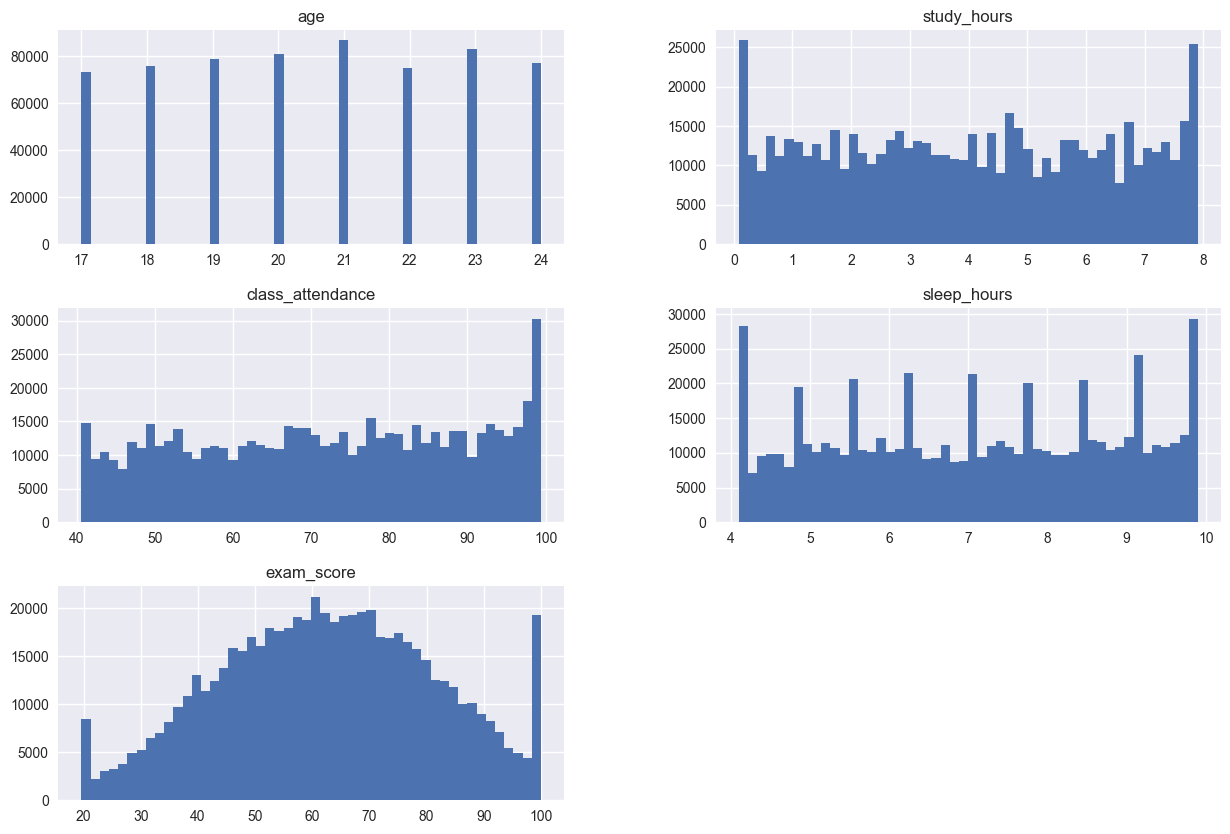

In [17]:
df.hist(bins=50, figsize=(15,10))
plt.show()

#### Categorical Analysis

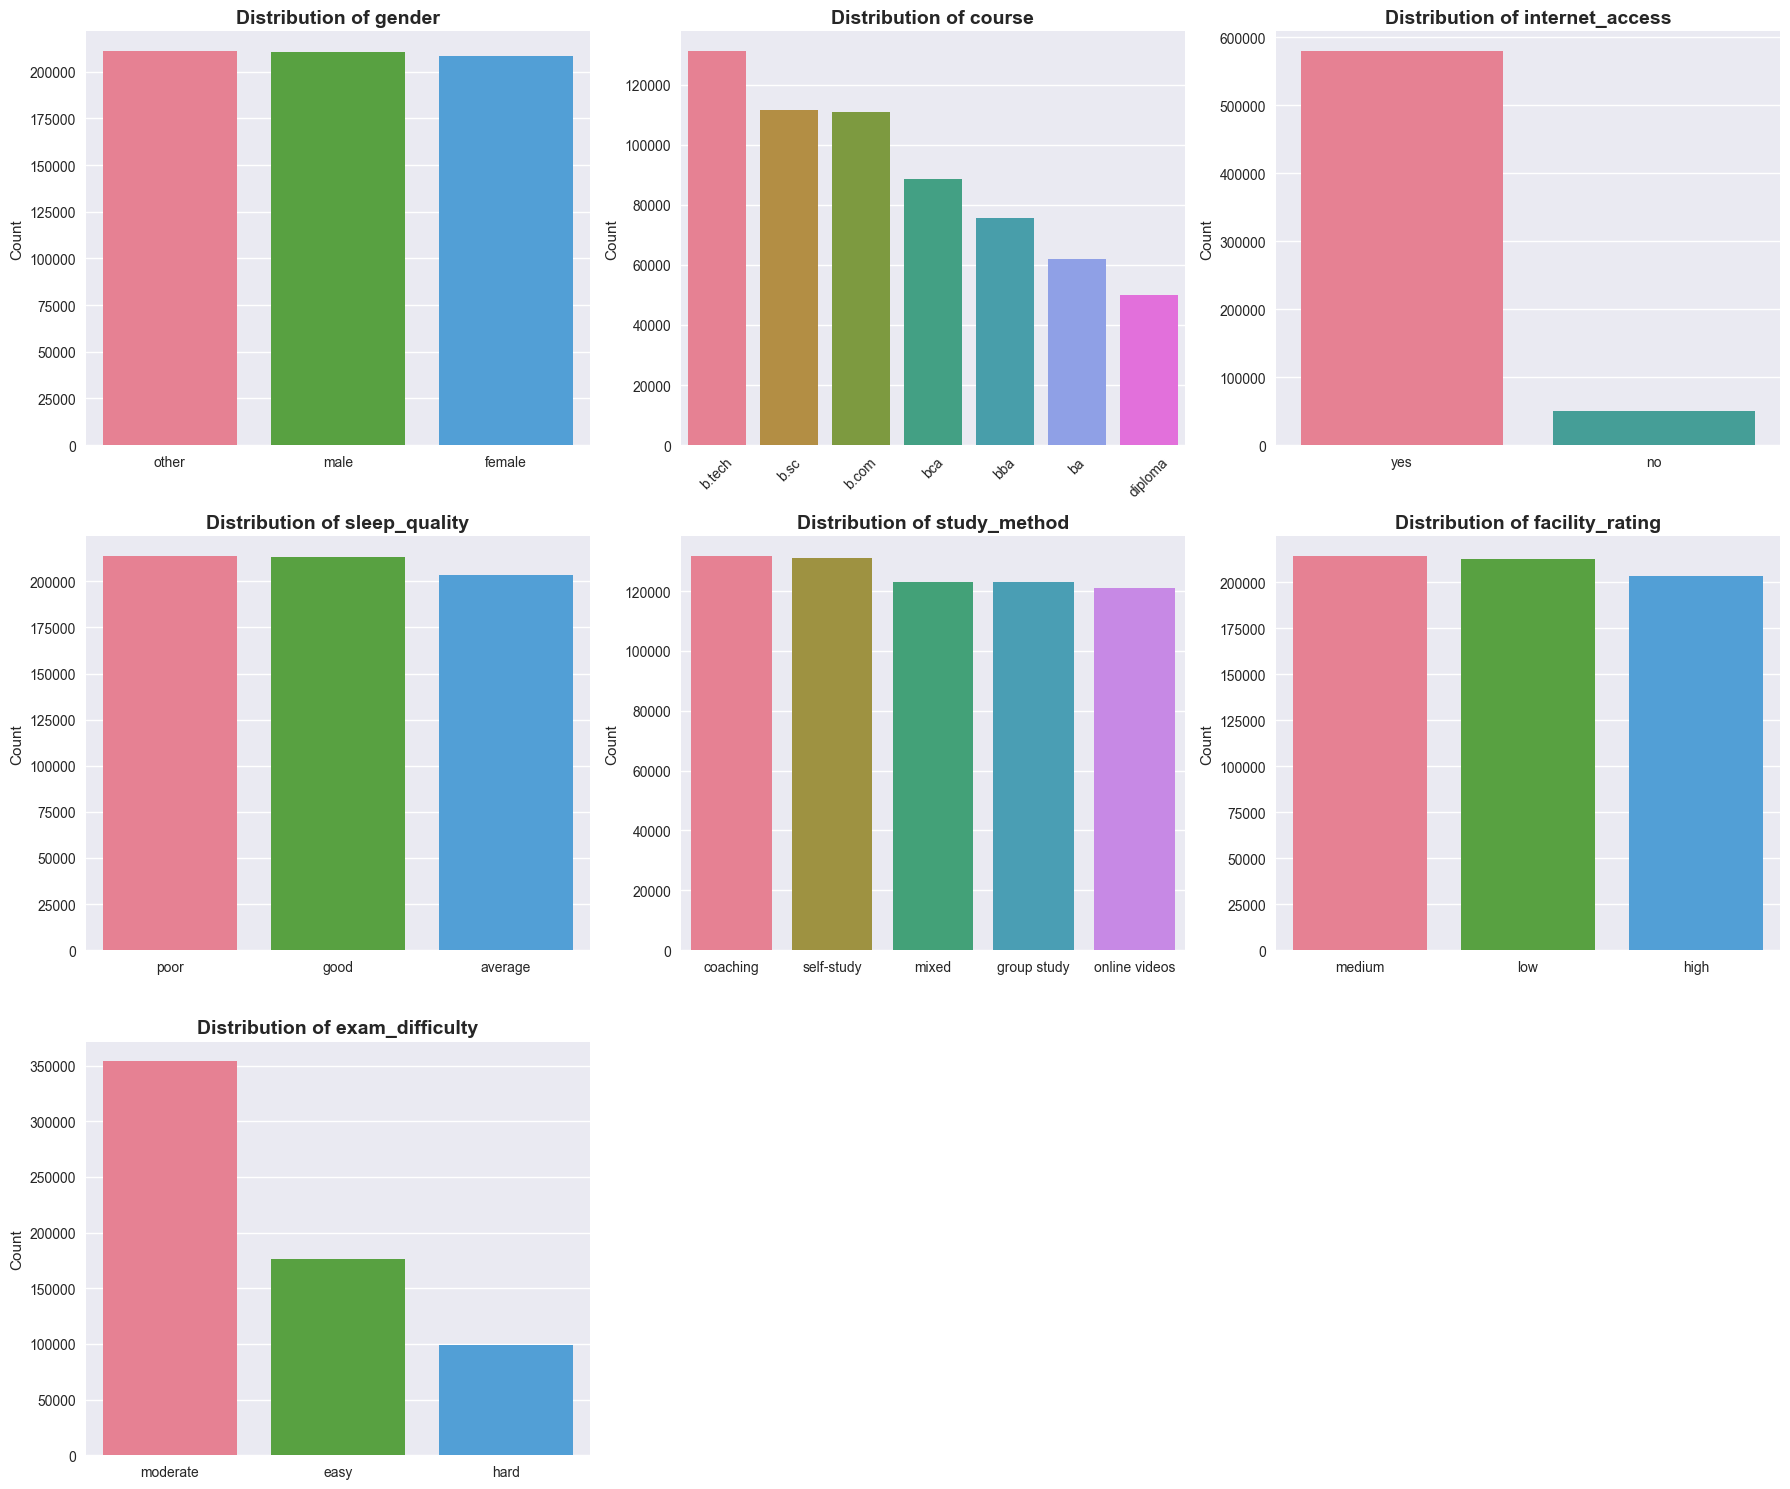

In [18]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

cols_per_row = 3
num_rows = math.ceil(len(categorical_cols) / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(18, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    # Plot frequency distribution
    # order=... sorts bars from highest to lowest frequency
    sns.countplot(data=df, x=col, ax=axes[i], palette='husl', 
                  order=df[col].value_counts().index)
    
    axes[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    
    # Rotate x-axis labels if there are many categories or long names
    if df[col].nunique() > 5:
        axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Multivariate Analysis

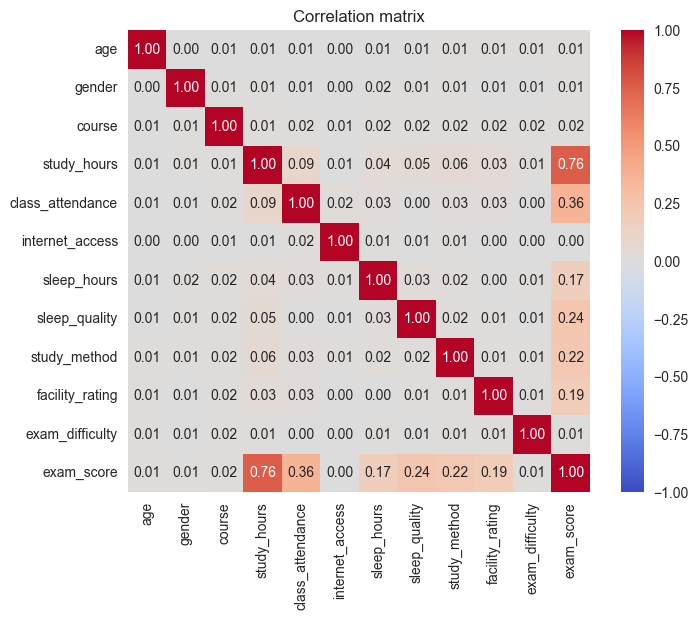


=== Feature correlation with exam_score ===
exam_score          1.000000
study_hours         0.762267
class_attendance    0.360954
sleep_quality       0.236959
study_method        0.223797
facility_rating     0.188969
sleep_hours         0.167410
course              0.017595
gender              0.013264
age                 0.010472
exam_difficulty     0.009717
internet_access     0.000447
Name: exam_score, dtype: float64


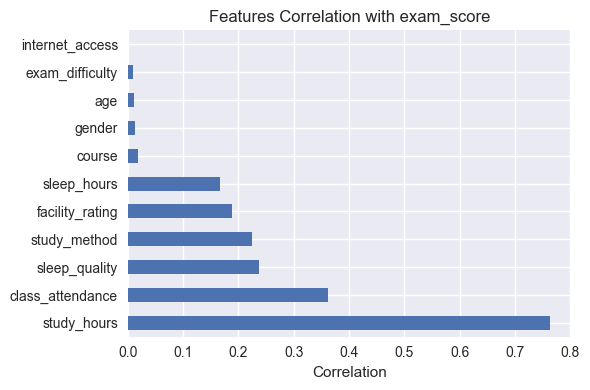

In [19]:
# === CORRELATION ANALYSIS ===

from dython.nominal import associations

analyze_cols = df.columns.tolist()
# print(analyze_cols)

# nom - nom: Theil’s U
# num - num: Correlation Ratio (η)
# num – num: Pearson

results = associations(df[analyze_cols], 
                       nominal_columns='auto',
                       numerical_columns=None, 
                       mark_columns=False,
                       title='Correlation matrix',
                       figsize=(8, 6),
                       cmap='coolwarm',
                       annot=True,
                       fmt='.2f')

corr_matrix = results['corr'] # get dataframe for correlation

target = 'exam_score'
print("\n=== Feature correlation with exam_score ===")
target_correlations = corr_matrix[target].sort_values(ascending=False)
print(target_correlations)

plt.figure(figsize=(6, 4))
target_correlations.drop(target).plot(kind='barh')
plt.xlabel('Correlation')
plt.title(f'Features Correlation with {target}')
plt.tight_layout()
plt.show()

# Bivariate Analysis 

In [ ]:
num_features = len(numerical_cols)
cols = 3
rows = (num_features + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
fig.suptitle('Numerical Features vs exam_score', fontsize=16, fontweight='bold')

axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.scatterplot(data=df, x=col, y='exam_score', alpha=0.3, ax=axes[idx])
    corr = df[col].corr(df['exam_score'])
    axes[idx].set_title(f'{col}\nCorrelation: {corr:.3f}')

for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
cat_features = len(categorical_cols)
cols = 3
rows = (cat_features + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
fig.suptitle('Categorical Features vs exam_score', fontsize=16, fontweight='bold')

axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    sns.boxplot(data=df, x=col, y='exam_score', ax=axes[idx])
    axes[idx].set_title(f'exam_score by {col}')
    axes[idx].tick_params(axis='x', rotation=45)

for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n" + "="*30 + " MEAN EXAM_SCORE BY GROUP " + "="*30)
for col in categorical_cols:
    print(f"\nGrouped by {col}:")
    print(df.groupby(col, observed=True)['exam_score'].mean().to_string())